## Unidad 3: Variables Aleatorias y Gráficos
### Actividad 05

### Genere una submuestra de casos acorde a lo siguiente:
1. Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria. Seleccione el 50% de los casos. Cada base generada debe contener los siguientes elementos:
    - El índice de desarrollo humano (`undp_hdi`)
    - El nombre del país (`ccodealp`)
    - La región a la que pertenece (`ht_region`)
    - El PIB per capita. (`gle_cgdpc`)
    - El total de la población (`imf_pop`).
    
- Si su apellido está entre la A y la M, escoja las siguientes variables del módulo Educación:
    - `ffp_hf`: Human Flight and Brain Drain.
    - `wef_qes`: Quality of the educational system.
    - `wdi_expedu`: Government expenditure on education, total (% of GDP)
    - `wdi_ners`: School enrollment, secondary (% net)
- Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
    - `wef_imort`: Infant mortality, deaths/1000 live births.
    - `who_alc2000`: Alcohol consumption per capita (2000-).
    - `who_tobt`: Current smoking of any tobacco product (Total).
    - `wdi_exph`: Government expenditure on health, total (% of GDP).
- Guarde esta tabla procesada en un nuevo objeto. 
- Renombre las categorías de la variable `ht_region` de números a regiones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv')

In [3]:
df.sample(5)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
154,694,Sierra Leone,SLE,451.0,694.0,QoGStdCSJan18,NaN,NaN,21.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,454,Malawi,MWI,553.0,454.0,QoGStdCSJan18,NaN,NaN,21.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,178,Congo,COG,484.0,178.0,QoGStdCSJan18,NaN,NaN,17.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,678,Sao Tome and Principe,STP,403.0,678.0,QoGStdCSJan18,NaN,NaN,7.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,340,Honduras,HND,91.0,340.0,QoGStdCSJan18,NaN,NaN,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_subsample = df.sample(frac=0.5, random_state = 6793)

In [5]:
df_subsample2 = df_subsample.loc[:,['undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop','ffp_hf','wef_qes','wdi_expedu', 'wdi_ners']]

In [6]:
df_subsample2['region_recod'] = df_subsample2['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                           ['EastEurope', 'LatAm', 'NorthAfrica',
                                                            'SubSaharian', 'WesternDem', 'EastAsia',
                                                            'SouthEastAsia','SouthAsia','Pacific', 'Caribbean'])

In [7]:
df_subsample2.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod
78,0.774,IRN,3,12889.28000,75.150002,6.2,3.012431,2.95419,80.731201,NorthAfrica
32,0.347,CAF,4,690.03998,NaN,6.9,NaN,1.22393,13.600750,SubSaharian
50,0.718,DOM,2,10376.63000,NaN,7.6,2.636395,NaN,65.457611,LatAm
191,0.702,WSM,9,3167.75000,0.192000,8.9,NaN,NaN,79.545982,Pacific
181,0.748,UKR,1,9326.71970,42.759998,5.5,3.673649,5.86354,88.565857,EastEurope


## Genere una función que ingrese su objeto y devuelva lo siguiente
1. Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos
- Para cada variable discreta, que calcule la frecuencia.
- Reporte las estadísticas descriptivas para `gle_cgdpc`, `undp_hdi`, `imf_pop`. Compare las estadísticas con algún compañero. ¿Ve alguna diferencia substancial en alguna de ellas?

In [8]:
def med_descriptivas(dataframe):
    
    """
    Función que retorna las medidas descriptivas para atributos continuos y la frecuencia para atributos de discretas
    """
    
    for colname, serie in dataframe.iteritems():
        if pd.api.types.is_numeric_dtype(serie):
            print(dataframe[colname].describe())
        else:
            print(dataframe[colname].value_counts())

In [9]:
med_descriptivas(df_subsample2)

count    94.000000
mean      0.685947
std       0.162429
min       0.347000
25%       0.551250
50%       0.718500
75%       0.798750
max       0.924000
Name: undp_hdi, dtype: float64
CZE    1
CPV    1
FIN    1
DJI    1
KOR    1
WSM    1
NZL    1
JPN    1
NAM    1
HND    1
LVA    1
IDN    1
GHA    1
TCD    1
DNK    1
NLD    1
RWA    1
IRN    1
CIV    1
TWN    1
SEN    1
AUT    1
MOZ    1
KAZ    1
EGY    1
SSD    1
SYC    1
CMR    1
ARM    1
ESP    1
      ..
BDI    1
LSO    1
LUX    1
VUT    1
AND    1
GMB    1
LKA    1
MWI    1
GRC    1
KEN    1
MNG    1
GRD    1
PER    1
LBR    1
BRN    1
SLE    1
FJI    1
IRL    1
PRY    1
VEN    1
KHM    1
ZAF    1
SOM    1
PRK    1
CAF    1
HTI    1
MRT    1
GNB    1
BIH    1
LAO    1
Name: ccodealp, Length: 97, dtype: int64
count    97.000000
mean      4.474227
std       2.367720
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: ht_region, dtype: float64
count       96.000000
mean     13076.593275

In [10]:
df_subsample2.to_csv('sebastian-contreras-act05.csv') #exportar csv

### Comparar estadísticas son csv generado por Ayleen Vasquez

In [11]:
df_classmate = pd.read_csv('Subsample_Ayleen.csv') #cargar dataframe compañero de clases

In [12]:
#quitar columna Unnamed:0
df_classmate = df_classmate.drop(columns="Unnamed: 0")

In [13]:
med_descriptivas(df_classmate)

count    94.000000
mean      0.708787
std       0.149437
min       0.347000
25%       0.606750
50%       0.733500
75%       0.798000
max       0.937000
Name: undp_hdi, dtype: float64
CZE    1
KHM    1
MOZ    1
ARM    1
CUB    1
ATG    1
KOR    1
ETH    1
NLD    1
JPN    1
DOM    1
KIR    1
DMA    1
GUY    1
BTN    1
LAO    1
MYS    1
CAN    1
COL    1
IRN    1
MCO    1
SEN    1
GBR    1
SDN    1
BEN    1
AFG    1
HRV    1
CAF    1
TJK    1
LIE    1
      ..
AUS    1
LCA    1
PAN    1
FRA    1
BWA    1
TUN    1
BIH    1
SAU    1
TKM    1
KGZ    1
KWT    1
UKR    1
ALB    1
BOL    1
SWZ    1
MDV    1
DEU    1
USA    1
CHL    1
MDG    1
FJI    1
IRL    1
SWE    1
GRC    1
MWI    1
SOM    1
IND    1
NZL    1
AZE    1
RWA    1
Name: ccodealp, Length: 97, dtype: int64
count    97.000000
mean      4.793814
std       2.824514
min       1.000000
25%       3.000000
50%       4.000000
75%       7.000000
max      10.000000
Name: ht_region, dtype: float64
count        95.000000
mean      15441.7636

El dataframe generado de manera aleatoria por el compañero de clases, incluyó paises que en promedio tienen un mayor indice de los atributos `undp_hdi`, `gle_cgdpc` y `imf_pop`, en base a esta información, se podría inferir que el dataframe del compañero de clases está compuesto con países con mejor calidad de desarrollo humano.

## Genere una función que liste las observaciones perdidas de una variable
1. La función debe contener los siguientes argumentos:
    - `dataframe`: La función debe ingresar un objeto DataFrame.
    - `var`: Variable a inspeccionar.
    - `print_list`: Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser `False` por defecto.
- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando `print_list = True`, debe retornar la lista de casos.
- Analice todas las variables y sus casos perdidos. Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [14]:
def print_miss_values(dataframe,var,print_list = False):
    
    """
    Función que retorna la cantidad de casos perdidos y el porcentaje correspondiente, con el argumento opcional "print_list", el cual lista los casos con datos perdidos
    """
    
    print(dataframe[var].isna().value_counts('%'))
    print(dataframe[var].isna().value_counts())
    print("")
    tmp_na = dataframe[dataframe[var].isna()]['ccodealp']
    if print_list is True:
        print(tmp_na)

In [15]:
print_miss_values(df_subsample2,'imf_pop') #probando la función

False    0.690722
True     0.309278
Name: imf_pop, dtype: float64
False    67
True     30
Name: imf_pop, dtype: int64



In [16]:
for colname, serie in df_subsample2.iteritems():
    print_miss_values(df_subsample2,colname)

False    0.969072
True     0.030928
Name: undp_hdi, dtype: float64
False    94
True      3
Name: undp_hdi, dtype: int64

False    1.0
Name: ccodealp, dtype: float64
False    97
Name: ccodealp, dtype: int64

False    1.0
Name: ht_region, dtype: float64
False    97
Name: ht_region, dtype: int64

False    0.989691
True     0.010309
Name: gle_cgdpc, dtype: float64
False    96
True      1
Name: gle_cgdpc, dtype: int64

False    0.690722
True     0.309278
Name: imf_pop, dtype: float64
False    67
True     30
Name: imf_pop, dtype: int64

False    0.948454
True     0.051546
Name: ffp_hf, dtype: float64
False    92
True      5
Name: ffp_hf, dtype: int64

False    0.804124
True     0.195876
Name: wef_qes, dtype: float64
False    78
True     19
Name: wef_qes, dtype: int64

False    0.731959
True     0.268041
Name: wdi_expedu, dtype: float64
False    71
True     26
Name: wdi_expedu, dtype: int64

False    0.670103
True     0.329897
Name: wdi_ners, dtype: float64
False    65
True     32
Name: wdi_n

In [17]:
na_columns = []
na_columns = df_subsample2.isna().sum()

In [18]:
na_columns.sort_values(ascending=False) #sort nan desc

wdi_ners        32
imf_pop         30
wdi_expedu      26
wef_qes         19
ffp_hf           5
undp_hdi         3
gle_cgdpc        1
region_recod     0
ht_region        0
ccodealp         0
dtype: int64

### Listar los países para las variables que tienen mayor ausencia de datos

In [19]:
df_subsample2[df_subsample2['imf_pop'].isna()]['ccodealp']

32     CAF
50     DOM
29     CMR
159    SOM
73     HND
53     GNQ
163    SSD
55     ERI
145    KNA
65     GHA
42     CRI
175    ARE
34     TCD
139    GNB
72     HTI
89     PRK
118    NAM
69     GTM
151    SEN
97     LBR
60     DJI
68     GRD
95     LSO
190    VEN
61     GAB
52     SLV
63     GMB
149    STP
3      AND
26     BDI
Name: ccodealp, dtype: object

In [20]:
df_subsample2[df_subsample2['wdi_expedu'].isna()]['ccodealp']

50     DOM
191    WSM
159    SOM
53     GNQ
55     ERI
126    NGA
130    PLW
175    ARE
22     SLB
72     HTI
37     TWN
89     PRK
67     GRC
118    NAM
91     KWT
60     DJI
18     BIH
98     LBY
150    SAU
68     GRD
95     LSO
190    VEN
115    MAR
183    EGY
2      DZA
133    PNG
Name: ccodealp, dtype: object

In [21]:
df_subsample2[df_subsample2['wef_qes'].isna()]['ccodealp']

32     CAF
191    WSM
159    SOM
53     GNQ
163    SSD
55     ERI
145    KNA
130    PLW
139    GNB
22     SLB
27     BLR
89     PRK
60     DJI
68     GRD
122    VUT
149    STP
57     FJI
3      AND
133    PNG
Name: ccodealp, dtype: object

## Grafique los histogramas

* Genere una función que grafique un histograma en conjunto y señale las medias.
* La función debe incluír los siguientes argumentos:
    - `dataframe`: La base de datos donde se encuentran los datos específicos.
    - `var`: La variable a graficar.
    - `sample_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser `False`.
    - `true_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.
    
* Implemente las funciones para las 4 variables seleccionadas según su grupo. ¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
def plot_hist(dataframe, var, sample_mean=False, true_mean=False):
    
    """
    Función que gráfica histograma de una variable a partir de un dataframe. Los argumentos opcionales sample_mean y true_mean agregarán una línea vertical indicando la media del dataframe de la submuestra y el original correspondiente. 
    """
    
    tmp_var = dataframe[var].dropna()
    plt.hist(tmp_var, color='slategrey',alpha=.4)
    if sample_mean is True:
        plt.axvline(tmp_var.mean(), color='tomato', lw=3, linestyle='--')
    if true_mean is True:
        plt.axvline(df[var].mean(), color='dodgerblue', lw=3, linestyle='--')

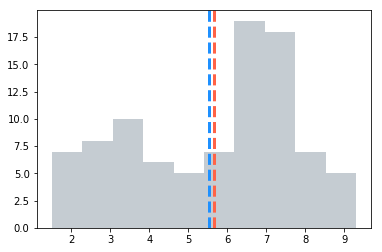

In [24]:
plot_hist(df_subsample2, 'ffp_hf', sample_mean=True, true_mean=True )

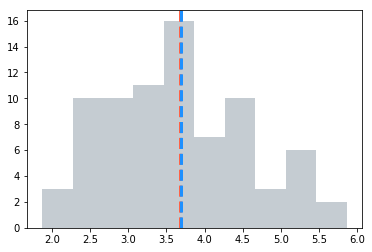

In [25]:
plot_hist(df_subsample2, 'wef_qes', sample_mean=True, true_mean=True ) 

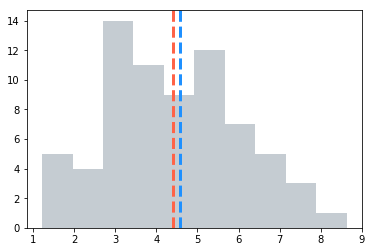

In [26]:
plot_hist(df_subsample2, 'wdi_expedu', sample_mean=True, true_mean=True ) 

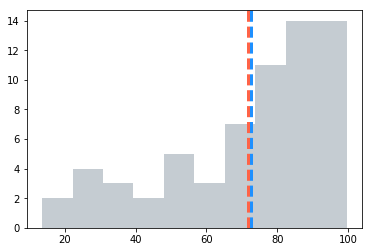

In [27]:
plot_hist(df_subsample2, 'wdi_ners', sample_mean=True, true_mean=True )

Para el atributo `ffp_hs` la media de la submuestra es mayor a la media del dataset completo.

### Genere una función que devuelva un dotplot

* La función debe contener los siguientes argumentos como argumentos:
     - `dataframe`: La tabla de datos donde buscar las variables.
     - `plot_var`: La variable a analizar y extraer las medias.
     - `plot_by`: La variable agrupadora.
     - `global_stat`: Booleano. Si es `True` debe graficar la media global de la variable. Por defecto debe ser `False`.
     - statistic: Debe presentar dos opciones. `mean` para la media y `median` para la mediana. Por defecto debe ser `mean`.
     
 * Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

In [28]:
def dotplot(dataframe, plot_var, plot_by, global_stat=False, statistic='mean'):
    """
    Función que genera un dotplot de una variable agrupada por un atributo. El argumento opcional global_stat grafica la media global de la variable, mientras que el argumento statistic indica la medida estadística con que agrupa los datos
    """
    
    if statistic is 'mean':
        tmp_group_stat = dataframe.groupby(plot_by)[plot_var].mean()
        plt.plot(tmp_group_stat.values, tmp_group_stat.index, 'o', color = 'grey')
    if statistic is 'median':
        tmp_group_stat = dataframe.groupby(plot_by)[plot_var].median()
        plt.plot(tmp_group_stat.values, tmp_group_stat.index, 'o', color = 'grey')
    if global_stat == True:
        plt.axvline(df[plot_var].mean(), color = 'tomato', linestyle = '--')
    plt.legend();

In [29]:
na_columns.sort_values(ascending=True) #sort nan asc

ccodealp         0
ht_region        0
region_recod     0
gle_cgdpc        1
undp_hdi         3
ffp_hf           5
wef_qes         19
wdi_expedu      26
imf_pop         30
wdi_ners        32
dtype: int64

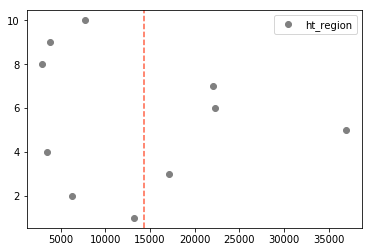

In [30]:
dotplot(df_subsample2,'gle_cgdpc', 'ht_region', global_stat=True, statistic='mean')

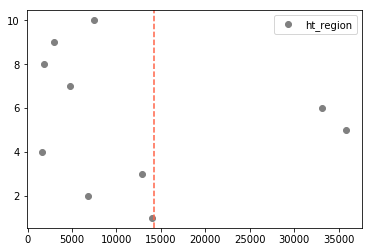

In [31]:
dotplot(df_subsample2,'gle_cgdpc', 'ht_region', global_stat=True, statistic='median')

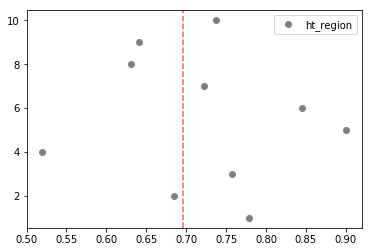

In [32]:
dotplot(df_subsample2,'undp_hdi', 'ht_region', global_stat=True, statistic='mean')

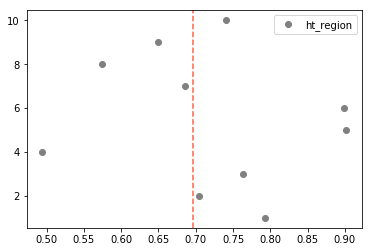

In [33]:
dotplot(df_subsample2,'undp_hdi', 'ht_region', global_stat=True, statistic='median')

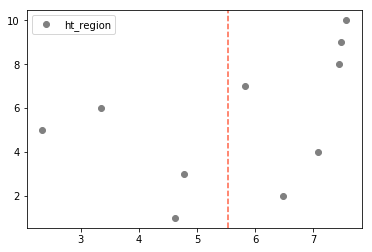

In [34]:
dotplot(df_subsample2,'ffp_hf', 'ht_region', global_stat=True, statistic='mean')

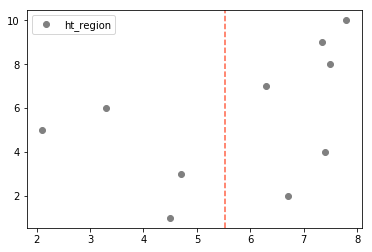

In [35]:
dotplot(df_subsample2,'ffp_hf', 'ht_region', global_stat=True, statistic='median')